In [1]:
## turn json file into csv, for phase I hand detection

In [2]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import json
from pprint import pprint
from matplotlib import pyplot as plt
from PIL import Image
import sys
import numpy as np
import matplotlib.patches as patches
import cv2
import pandas as pd

In [3]:
tensorflow_path = "/home/qiaohe/models"
sys.path.append(tensorflow_path + "/research")
sys.path.append(tensorflow_path + "/research/object_detection")
sys.path.append(tensorflow_path + "/research/object_detection/utils")
from utils import label_map_util
from utils import visualization_utils as vis_util

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/qiaohe/models/research/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/shared/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/shared/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/shared/anaconda3/lib/python3.6/site-package

In [4]:
base_dir = "/home/qiaohe/hand_pose"
json_file = os.path.join(base_dir, 'annotation.json')
csv_file = os.path.join(base_dir, 'hand_labels.csv')
segment_length = 20
image_dir = os.path.join(base_dir, 'Color')

In [5]:
img_list = os.listdir(image_dir)

In [6]:
img_name = [img[:-4] for img in img_list]

In [7]:
with open(json_file) as f:
    data = json.load(f)
pprint(f)

<_io.TextIOWrapper name='/home/qiaohe/hand_pose/annotation.json' mode='r' encoding='UTF-8'>


In [8]:
len(data)

94126

In [8]:
len(img_list)

57207

In [9]:
#see how many photos have both hands
tmp = []
for index, img in enumerate(img_name):
    if not(img + "_R" in data and img + "_L" in data):
        tmp.append(index)
print(len(tmp))

20288


In [10]:
count = np.zeros(580)
for i in range(len(img_name)):
    if i in tmp:
        count[i//100] += 1
print(count)

[41. 29. 35. 40. 29. 31. 35. 35. 34. 40. 41. 33. 28. 27. 28. 39. 26. 42.
 34. 35. 38. 43. 40. 28. 38. 30. 35. 35. 32. 26. 31. 27. 37. 38. 28. 34.
 35. 38. 43. 39. 37. 31. 39. 39. 38. 32. 34. 37. 34. 27. 27. 42. 34. 41.
 29. 34. 31. 36. 35. 33. 36. 40. 35. 34. 32. 49. 40. 39. 39. 42. 36. 39.
 31. 33. 36. 27. 31. 38. 35. 42. 29. 43. 35. 36. 45. 40. 33. 42. 49. 28.
 39. 35. 43. 27. 36. 35. 38. 45. 36. 40. 35. 34. 37. 34. 44. 34. 27. 35.
 35. 41. 34. 43. 35. 35. 36. 23. 50. 35. 42. 31. 37. 36. 33. 43. 34. 26.
 38. 36. 30. 41. 33. 43. 41. 38. 45. 34. 42. 38. 35. 38. 30. 48. 32. 27.
 34. 35. 36. 39. 35. 28. 34. 34. 43. 41. 41. 44. 38. 43. 30. 32. 33. 28.
 39. 32. 31. 41. 26. 40. 38. 40. 40. 44. 30. 44. 39. 38. 34. 29. 36. 39.
 39. 30. 43. 36. 38. 30. 35. 35. 29. 36. 27. 38. 39. 32. 37. 32. 38. 33.
 34. 28. 31. 36. 43. 34. 36. 31. 45. 43. 34. 42. 36. 38. 37. 34. 39. 31.
 33. 40. 37. 36. 34. 31. 33. 39. 31. 37. 25. 36. 36. 33. 33. 31. 32. 37.
 27. 42. 39. 34. 40. 29. 36. 40. 42. 44. 31. 37. 31

In [11]:
def paint_boundary(index):
    img = cv2.imread(os.path.join(image_dir,img_list[index]))
    if img_name[index]+"_L" in data:
        pos = record_boundary(index, "_L")
        img = cv2.rectangle(img, pos[0], pos[1] , (0, 255, 0), 3) #(row['xmin'], row['ymin']), (row['xmax'], row['ymax'])
    if img_name[index]+"_R" in data:
        pos = record_boundary(index, "_R")
        img = cv2.rectangle(img, pos[0], pos[1] , (0, 255, 0), 3) #(row['xmin'], row['ymin']), (row['xmax'], row['ymax'])     
    return img

In [12]:
def record_boundary(index, direction):
    name = img_name[index]+direction
    xy = np.array(data[name])
    x_arr = xy[:,0]
    y_arr = xy[:,1]
    segment_length = 20
    x_max = max(x_arr) + segment_length
    y_max = max(y_arr) + segment_length
    x_min = min(x_arr) - segment_length
    y_min = min(y_arr) - segment_length
    return [(int(x_min), int(y_min)), (int(x_max), int(y_max))]


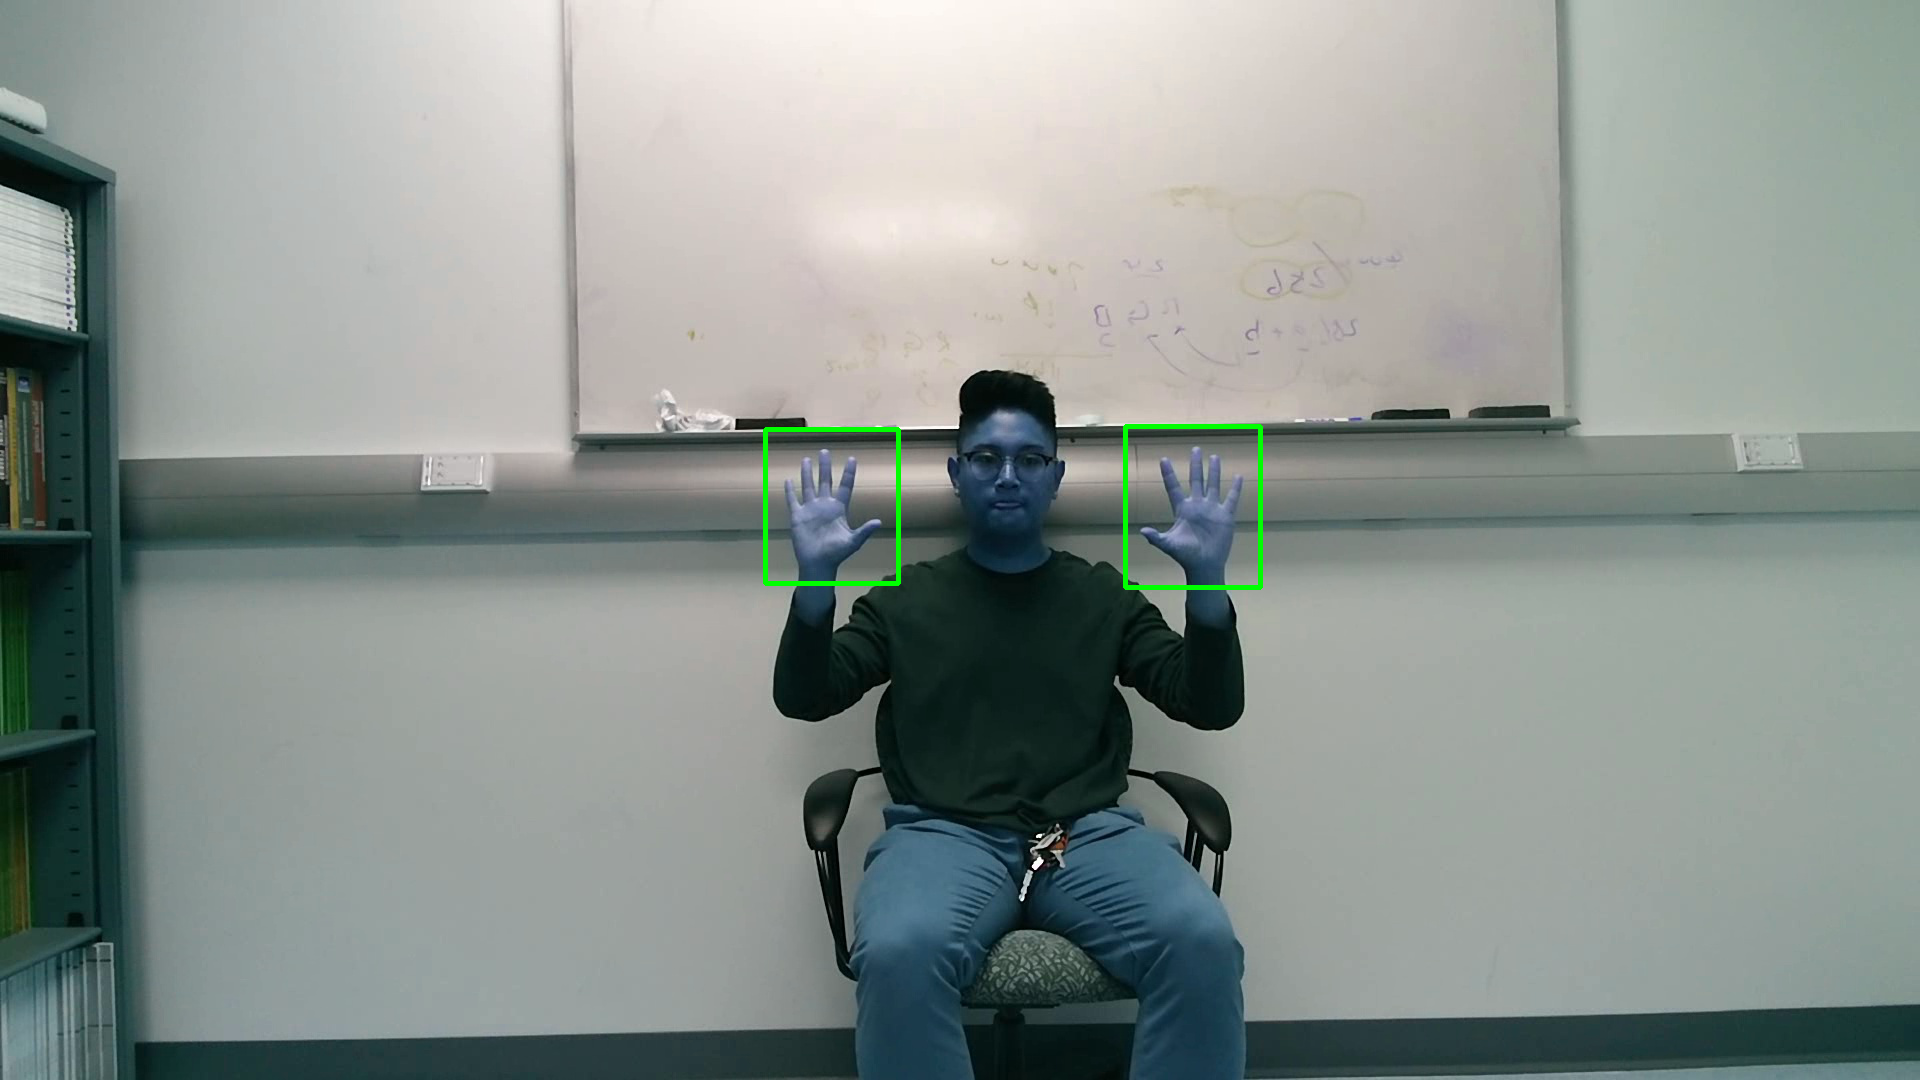

In [18]:
Image.fromarray(paint_boundary(26000))

In [14]:
def return_value(index, direction):
    pos = record_boundary(index, direction)
    xmin = pos[0][0]
    ymin = pos[0][1]
    xmax = pos[1][0]
    ymax = pos[1][1]
    value = (img_name[index]+'.jpg', #+direction,
             xmax-xmin,
             ymax-ymin,
             'hand',
             xmin,
             ymin,
             xmax,
             ymax
             )
    return value

In [15]:
xml_list = []
#for xml_file in glob.glob(path + '/*.xml'):
for index, img in enumerate(img_name):
    if img + '_R' in data:
        xml_list.append(return_value(index, '_R'))
    if img + '_L' in data:
        xml_list.append(return_value(index, '_L'))
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df = pd.DataFrame(xml_list, columns=column_name) #use panda
#print(xml_df)

In [16]:
len(xml_list)

94126

In [17]:
xml_df.to_csv(csv_file, index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


In [9]:
img = cv2.imread(os.path.join(image_dir,img_list[0]))
print(img, img.shape)
cv2.imwrite("/home/qiaohe/image_processed.png", img)

[[[124 139 135]
  [124 139 135]
  [124 139 135]
  ...
  [137 157 145]
  [137 157 145]
  [137 157 145]]

 [[124 139 135]
  [124 139 135]
  [124 139 135]
  ...
  [137 157 145]
  [137 157 145]
  [137 157 145]]

 [[124 139 135]
  [124 139 135]
  [124 139 135]
  ...
  [137 157 145]
  [137 157 145]
  [137 157 145]]

 ...

 [[120 141 143]
  [136 157 159]
  [138 159 161]
  ...
  [ 93 121 122]
  [ 93 121 122]
  [ 93 121 122]]

 [[123 144 146]
  [136 157 159]
  [136 157 159]
  ...
  [ 93 121 122]
  [ 93 121 122]
  [ 93 121 122]]

 [[125 146 148]
  [136 157 159]
  [134 155 157]
  ...
  [ 92 120 121]
  [ 92 120 121]
  [ 92 120 121]]] (1080, 1920, 3)


True